In [7]:
from pymongo import MongoClient
import pandas as pd
from bson.objectid import ObjectId
import datetime

connectionLocal = MongoClient('localhost', 27017)
db = connectionLocal.ETF_db
arbitragecollection = db.ArbitrageCollection

# Convert UTC to EST accounting for day light saving 
import pytz
est = pytz.timezone('US/Eastern')
utc = pytz.utc
fmt = '%Y-%m-%d %H:%M:%S %Z%z'

# Jupyter Notebook to display all the columns in a df
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [8]:
# Create input for ETFs
listofetfs = ['XLK','VGT','IYW','FTEC']
dateOfAnalyis = datetime.datetime.strptime('2020-03-17','%Y-%m-%d')
year=dateOfAnalyis.year

In [9]:
loadData={}
for etfname in listofetfs:
    # Load data from Db
    etfdata = arbitragecollection.find_one({"ETFName":etfname, 'dateOfAnalysis':dateOfAnalyis})
    # Extract data from ETFdb and convert to pandas Df
    etfdata = pd.DataFrame(etfdata['data'])
    # Convert UTC time to EST time, Check if winter time - 5, Summer time - 4 
    if dateOfAnalyis > datetime.datetime(year-1,9,1) and dateOfAnalyis < datetime.datetime(year,3,8):
        etfdata['Time']=etfdata['Time'] - datetime.timedelta(hours=5)
    else:
        etfdata['Time']=etfdata['Time'] - datetime.timedelta(hours=4)
    loadData[etfname] =etfdata
    

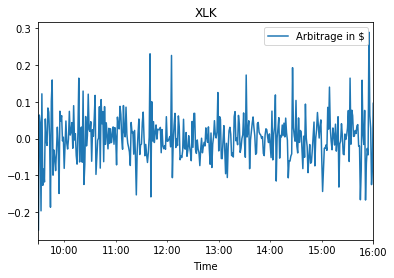

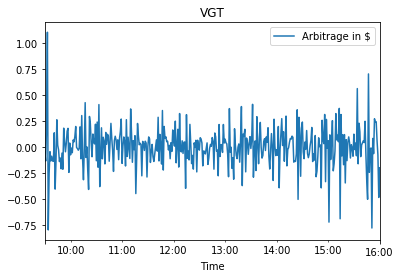

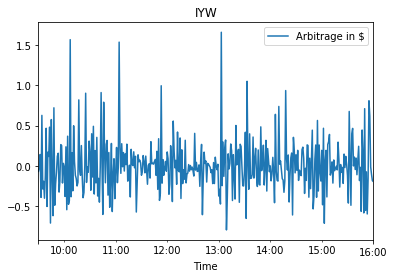

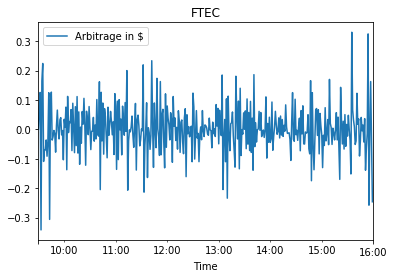

In [11]:
for i in listofetfs:
    loadData[i].reset_index().plot(x='Time', y='Arbitrage in $',title=i)

In [13]:
loadData['XLK'].sort()

,Time,ETF Price,ETF Change Price %,Net Asset Value Change%,ETF Trading Spread in $,Arbitrage in $,Flag,ETFMover%1,ETFMover%2,ETFMover%3,ETFMover%4,ETFMover%5,ETFMover%6,ETFMover%7,ETFMover%8,ETFMover%9,ETFMover%10,Change%1,Change%2,Change%3,Change%4,Change%5,Change%6,Change%7,Change%8,Change%9,Change%10
0,2020-03-17 09:30:00,74.3236,-0.331497,0.001933,0.066104,-0.247817,-111.0,"[V, -0.0244]","[AAPL, 0.0126]","[ACN, 0.0098]","[ORCL, -0.0089]","[INTC, 0.0084]","[AVGO, -0.0067]","[GPN, -0.0062]","[TXN, 0.0053]","[NTAP, -0.0041]","[IBM, 0.0038]","[JNPR, 2.5325]","[NTAP, -2.2431]","[JKHY, 1.2311]","[FLIR, 0.8992]","[GPN, -0.7361]","[QRVO, 0.7086]","[MCHP, -0.605]","[WU, 0.5169]","[ACN, 0.5132]","[V, -0.4731]"
1,2020-03-17 09:31:00,74.3117,-0.016011,-0.102143,0.054596,0.064006,111.0,"[V, -0.0772]","[AAPL, -0.0666]","[MA, -0.0323]","[TXN, 0.0303]","[INTU, -0.0255]","[INTC, 0.0247]","[CSCO, -0.0243]","[NOW, 0.0206]","[NVDA, 0.0173]","[PYPL, -0.0087]","[QRVO, 3.7171]","[JKHY, 2.1515]","[INTU, -2.1456]","[NOW, 1.9836]","[JNPR, 1.8949]","[XRX, 1.8635]","[ADS, -1.6892]","[TXN, 1.6014]","[PAYC, 1.5113]","[V, -1.4965]"
2,2020-03-17 09:32:00,74.6885,0.507053,0.448515,0.072677,0.043721,0.0,"[AAPL, 0.1348]","[V, 0.0548]","[ACN, 0.044]","[CSCO, 0.034]","[NVDA, 0.0286]","[CRM, 0.0205]","[INTC, 0.0182]","[MA, 0.0152]","[PYPL, 0.0151]","[TXN, 0.0128]","[ACN, 2.301]","[FLIR, -1.7767]","[ZBRA, 1.7746]","[VRSN, -1.6143]","[AMD, 1.2608]","[CSCO, 1.1812]","[LDOS, 1.1775]","[NVDA, 1.1272]","[V, 1.0623]","[SWKS, 0.9144]"
3,2020-03-17 09:33:00,74.5047,-0.246089,0.017030,0.060356,-0.196036,-111.0,"[AAPL, 0.0366]","[INTC, -0.0139]","[CRM, -0.0136]","[V, 0.0099]","[HPQ, 0.0086]","[NVDA, -0.0085]","[CSCO, -0.0081]","[ORCL, 0.0078]","[MA, -0.0076]","[INTU, 0.0073]","[DXC, -2.9195]","[HPQ, 2.1155]","[JNPR, 1.1567]","[LDOS, 0.9181]","[CDNS, 0.9011]","[QRVO, -0.8297]","[MXIM, 0.7605]","[ADI, 0.7504]","[FLIR, 0.6717]","[IPGP, 0.6705]"
4,2020-03-17 09:34:00,74.2951,-0.281325,-0.445040,0.073641,0.121633,111.0,"[AAPL, -0.0661]","[V, -0.0439]","[ORCL, -0.0375]","[CSCO, -0.0281]","[MA, -0.0271]","[IBM, -0.0265]","[NVDA, -0.0216]","[INTU, -0.0194]","[QCOM, -0.0182]","[AVGO, -0.0118]","[ORCL, -1.9344]","[INTU, -1.6317]","[DXC, 1.4878]","[IBM, -1.4658]","[XRX, -1.3606]","[QCOM, -1.2128]","[SNPS, -1.1724]","[AMD, -1.0638]","[GPN, -1.0592]","[SWKS, -0.9947]"
5,2020-03-17 09:35:00,74.0738,-0.297866,-0.126553,0.035078,-0.126898,-111.0,"[AAPL, -0.0389]","[MA, -0.0234]","[NVDA, -0.0157]","[INTC, 0.0155]","[PYPL, -0.0143]","[ORCL, -0.0138]","[V, -0.0104]","[ADI, -0.0064]","[CSCO, 0.0059]","[IBM, -0.0057]","[FLIR, 1.328]","[ADI, -0.9565]","[ADS, -0.8754]","[QRVO, -0.8055]","[ADSK, -0.7574]","[ORCL, -0.711]","[GLW, 0.6931]","[ANSS, 0.6782]","[DXC, -0.6623]","[PYPL, -0.6527]"
6,2020-03-17 09:36:00,73.8741,-0.269596,-0.157587,0.026413,-0.082746,-111.0,"[AAPL, -0.0742]","[MA, -0.011]","[NOW, -0.0093]","[ORCL, -0.0082]","[PYPL, -0.0071]","[CRM, -0.0069]","[V, 0.0066]","[FISV, -0.0065]","[INTC, -0.0058]","[TXN, -0.0054]","[ADS, -2.3151]","[DXC, -1.8505]","[FLIR, 0.9293]","[NOW, -0.8944]","[CTXS, 0.8824]","[ADSK, -0.8088]","[FTNT, 0.7871]","[JNPR, -0.7553]","[MCHP, -0.7534]","[IT, -0.7352]"
7,2020-03-17 09:37:00,73.4174,-0.618214,-0.457984,0.024351,-0.117637,-111.0,"[AAPL, -0.1342]","[PYPL, -0.0385]","[V, -0.0377]","[MA, -0.0344]","[NVDA, -0.0227]","[CSCO, -0.0191]","[ADBE, -0.0145]","[ACN, -0.0131]","[ORCL, -0.0116]","[ADP, -0.0112]","[PYPL, -1.7549]","[PAYX, -1.0562]","[ADP, -1.0468]","[DXC, -1.0418]","[NVDA, -0.8944]","[NLOK, -0.8632]","[MA, -0.8538]","[QRVO, -0.827]","[ADS, -0.8133]","[FISV, -0.8045]"
8,2020-03-17 09:38:00,73.4725,0.075050,0.002403,0.025658,0.053376,111.0,"[CSCO, 0.0293]","[PYPL, -0.0275]","[V, -0.0273]","[INTC, 0.0261]","[AAPL, 0.0112]","[ADSK, -0.0107]","[QCOM, 0.0082]","[MA, -0.0071]","[AVGO, -0.0063]","[ORCL, 0.0055]","[ADSK, -1.6428]","[PYPL, -1.253]","[FLIR, -1.1633]","[CSCO, 1.0183]","[TEL, 0.9188]","[APH, -0.8721]","[INTC, 0.6269]","[QCOM, 0.546]","[GLW, 0.5